# Compare Models
---
Compare the performance of various outlier detection and classifier models in differentiating between healthy and unhealthy gene expression.

In [19]:
import pandas
import plotnine
from plotnine import *

plotnine.options.figure_size = (8,6)

### Compare the accuracy of each model on ten different validation sets

In [9]:
# Load the dataframe generated by evaluate_models.py
result_df = pandas.read_csv('../results/model_eval_results.csv', index_col=0)

result_df['acc_over_baseline'] = result_df['val_acc'] - result_df['val_baseline']

result_df.head()

,Model,LR,Seed,val_acc,val_auroc,val_baseline,lv_count,acc_over_baseline,model_lv
0,IForest,0.00001,0,0.480821,0.553407,0.576271,100,-0.095450,IForest_100
1,OCSVM,0.00001,0,0.423729,0.537926,0.576271,100,-0.152542,OCSVM_100
2,LogisticRegression,0.00001,0,0.624442,0.607831,0.576271,100,0.048171,LogisticRegression_100
3,MLP,0.00001,0,0.734166,0.732504,0.576271,100,0.157895,MLP_100
4,TenLayerNet,0.00001,0,0.715433,0.738234,0.576271,100,0.139161,TenLayerNet_100


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 80 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  

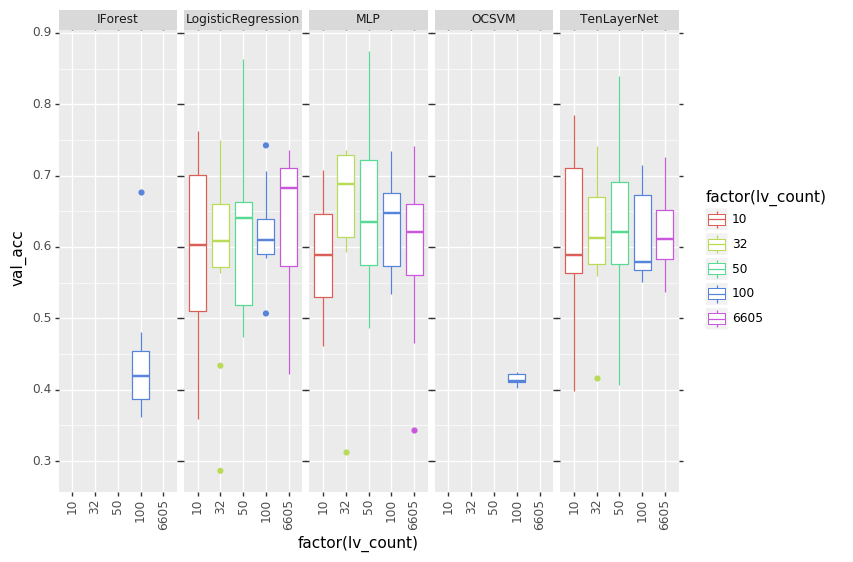

<ggplot: (8760847652265)>

In [31]:
ggplot(result_df, aes(x='factor(lv_count)', y='val_acc', color='factor(lv_count)')) +\
geom_boxplot() +\
facet_grid('. ~ Model') +\
theme(axis_text_x=element_text(rotation=90, hjust=0.5))

### Plot adjusted accuracy
---
Since the accuracy measurements are based on different validation sets, it makes sense to compare them to a baseline model. In this case, the baseline predicts that every sample is from the larger class. The field `acc_over_baseline` is generated by subtracting the baseline model's accuracy from the main model.

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 80 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  

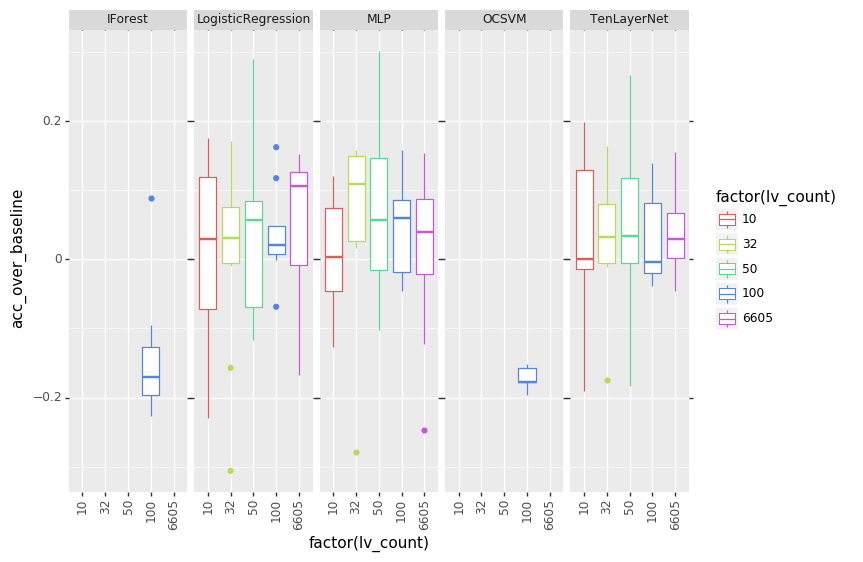

<ggplot: (-9223363276008078855)>

In [30]:
ggplot(result_df, aes(x='factor(lv_count)', y='acc_over_baseline', color='factor(lv_count)')) +\
geom_boxplot() +\
facet_grid('. ~ Model') +\
theme(axis_text_x=element_text(rotation=90, hjust=0.5))

### Plot AUROC
---
The area under the receiver operating curve is a metric that evaluates a model across all score cutoffs instead of just one.

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 80 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  

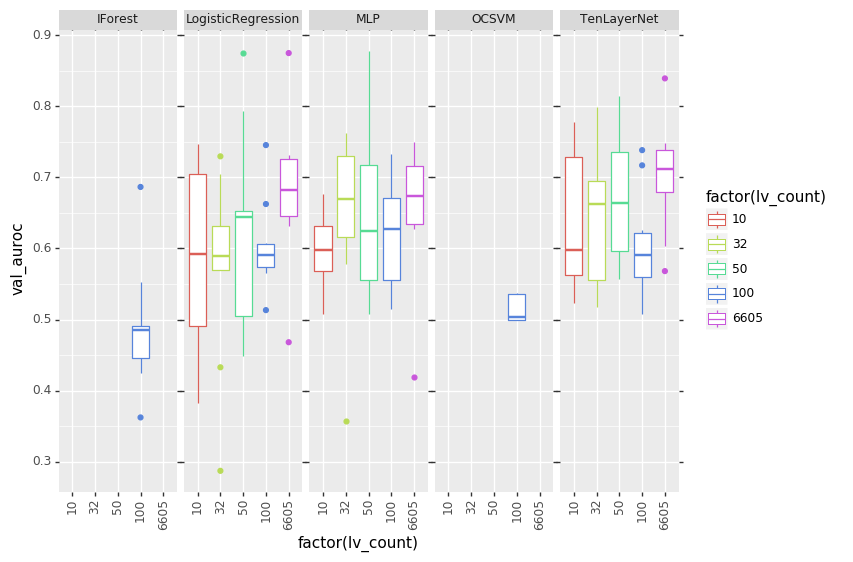

<ggplot: (-9223363276007123561)>

In [29]:
ggplot(result_df, aes(x='factor(lv_count)', y='val_auroc', color='factor(lv_count)')) +\
geom_boxplot() +\
facet_grid('. ~ Model') +\
theme(axis_text_x=element_text(rotation=90, hjust=0.5))